In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Data is imported
df = pd.read_csv('train.csv')

In [3]:
#Shape (No of rows and columns)
df.shape

(891, 12)

In [4]:
#Preview the first 5 rows data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Listing the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
#Info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Summarizing the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Analysis
#missing values are in age,cabin,embarked
#Maximum number of values are missing in canin column
#Some of the columns have inappropriate data types


In [9]:
#Dropping the cabin column due to 70% of missing values
df.drop(columns=['Cabin'],inplace = True)

In [10]:
#Using fillna method via mean for filling missing values of age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
#Finding the mosy appeaared value in embarked column
#Imputing missing values for embarked
most_common = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common)

In [12]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
#Changing the data typesof the following columns
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    category
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(5), float64(1), int64(3), object(2)
memory usage: 49.5+ KB


In [16]:
#Five point summary
df.describe()

,PassengerId,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.523008,0.381594,32.204208
std,257.353842,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,0.000000,31.000000
max,891.000000,8.000000,6.000000,512.329200


Out of 891 passengers, 62% people died in the accident


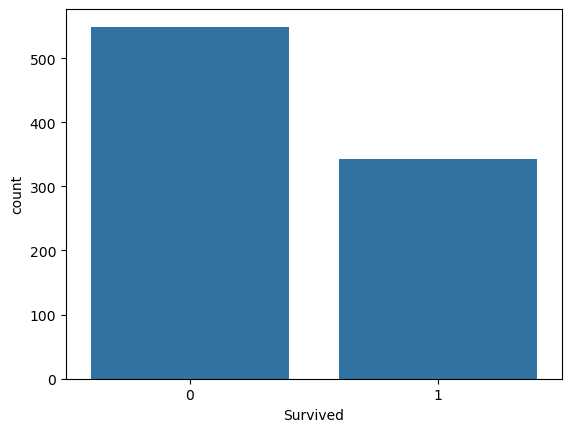

In [17]:
#Univariate Analysis
#Let's start with the Survived column
#Finding how much percent of the persons are alive and died
# Countplot for Survived
sns.countplot(x='Survived', data=df)
# Calculate death percentage
death_percent = round(df['Survived'].value_counts()[0] / len(df) * 100)
# Print result
print("Out of {} passengers, {}% people died in the accident".format(len(df), death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

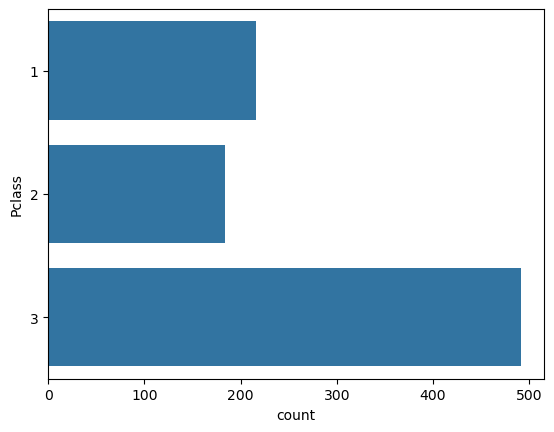

In [18]:
#Pclass column
#In which class maximum people travelled
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df['Pclass'])

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

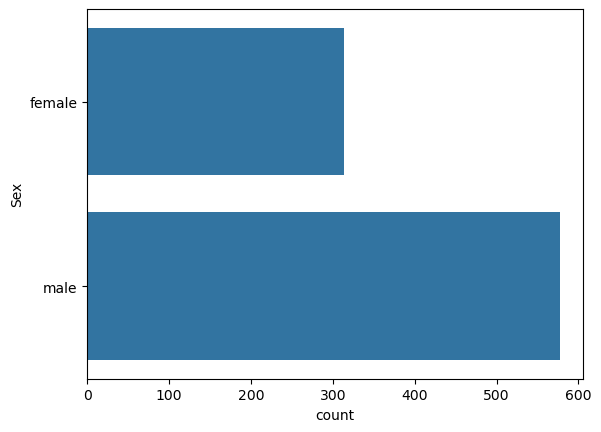

In [19]:
#which gender has travelled in more number
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


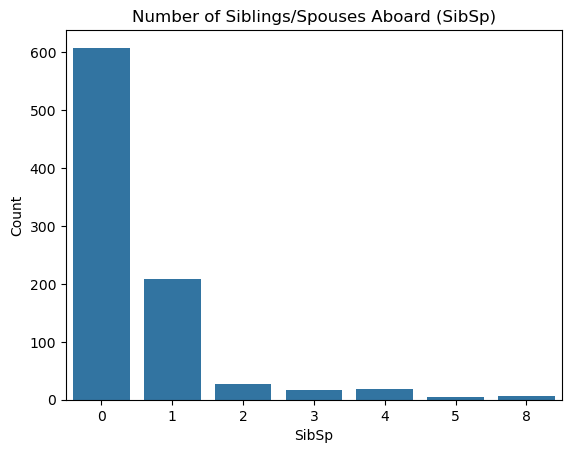

In [20]:
# Show value counts for SibSp
print(df['SibSp'].value_counts())
# Plot the count of each SibSp value
sns.countplot(x='SibSp', data=df)
plt.title('Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()


Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

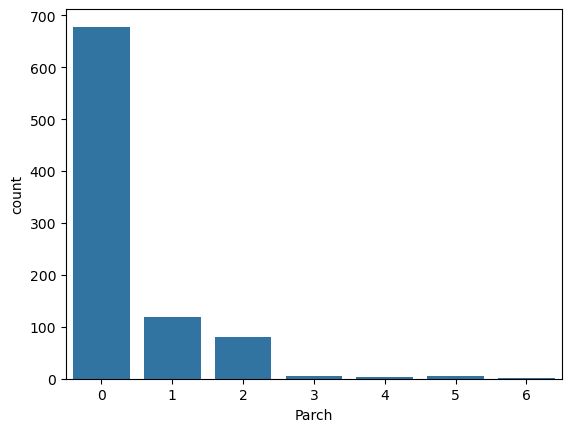

In [21]:
print((df['Parch'].value_counts() / len(df)) * 100)
sns.countplot(x='Parch', data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


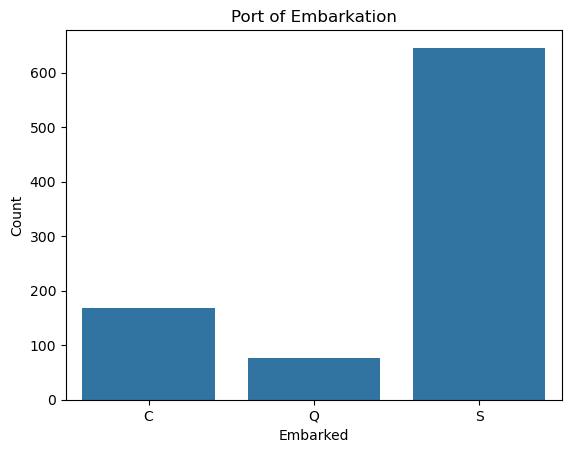

In [22]:
#which city has more travellers
# Print percentage distribution of 'Embarked' column
print((df['Embarked'].value_counts() / len(df)) * 100)
# Plot countplot for 'Embarked'
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

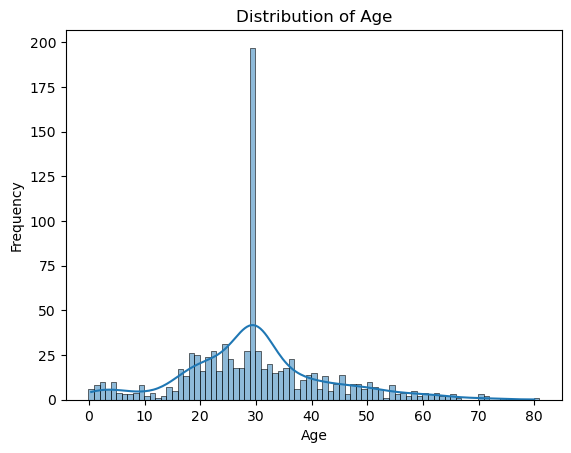

TypeError: 'Categorical' with dtype category does not support reduction 'skew'

In [23]:
#Age columns
# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Skewness and Kurtosis
print("Skewness:", df['Age'].skew())   
print("Kurtosis:", df['Age'].kurt())   

<Axes: ylabel='Age'>

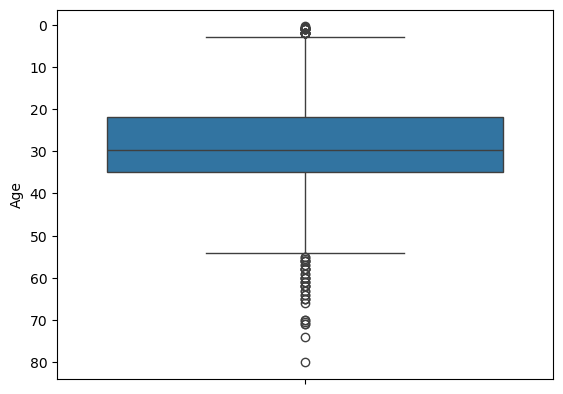

In [24]:
sns.boxplot(df['Age'])

In [25]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [26]:
#age wise distribution
print("People with age between 60 and 70:", df[(df['Age'] > 60) & (df['Age'] < 70)].shape[0])
print("People with age between 70 and 75:", df[(df['Age'] >= 70) & (df['Age'] <= 75)].shape[0])
print("People with age greater than 75:", df[df['Age'] > 75].shape[0])
print('-' * 50)
print("People with age less than 1:", df[df['Age'] < 1].shape[0])


People with age between 60 and 70: 15
People with age between 70 and 75: 6
People with age greater than 75: 1
--------------------------------------------------
People with age less than 1: 7


In [27]:
#For all practical purposes age an be onsidered as normal distribution
#Deeper analysis is requried for outliners


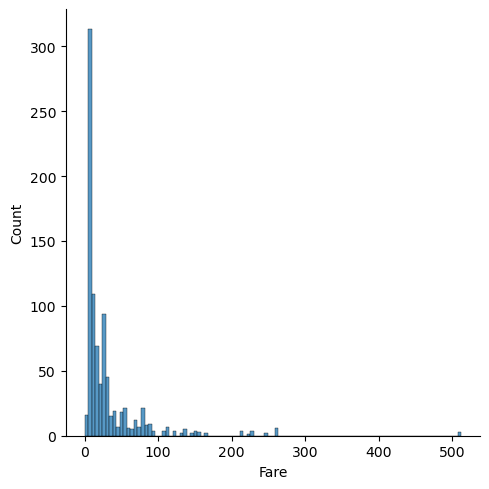

In [28]:
#Fare column
sns.displot(df['Fare'])

In [29]:
print(df['Fare'].skew())
print(df['Fare'].kurt()) #very high skew due to low price ticket that's why it has high peak

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

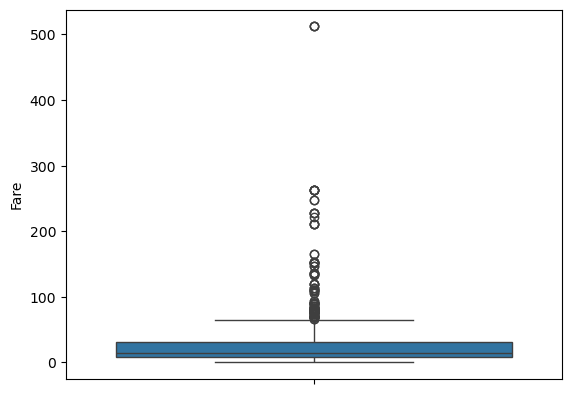

In [30]:
sns.boxplot(df['Fare'])

In [31]:
#Number of people spend fare between 200 and 300
#And greater than 300
print("People with fare between $200 and $300:", df[(df['Fare'] > 200) & (df['Fare'] < 300)].shape[0])
print("People with fare greater than $300:", df[df['Fare'] > 300].shape[0])

People with fare between $200 and $300: 17
People with fare greater than $300: 3


In [32]:
#Highly skewed data , a lot of people had cheaper tickets
#Outliers are there in the data

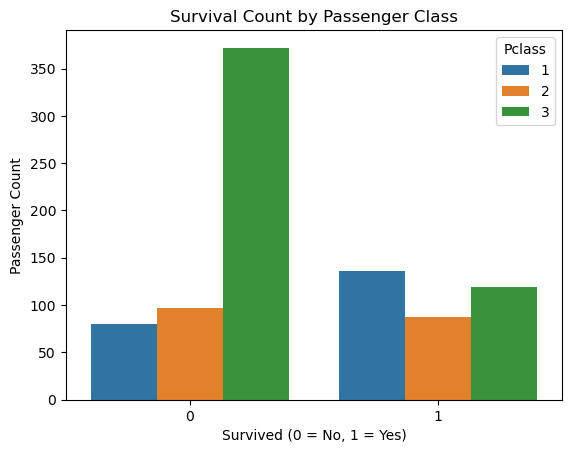


Percentage survival by Pclass:
Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


In [34]:
#Multivariate Analysis
#Survival with Pclass
# Countplot showing survival across Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.legend(title='Pclass')
plt.show()

# Cross-tabulation with percentage
print("\nPercentage survival by Pclass:")
print(pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1))

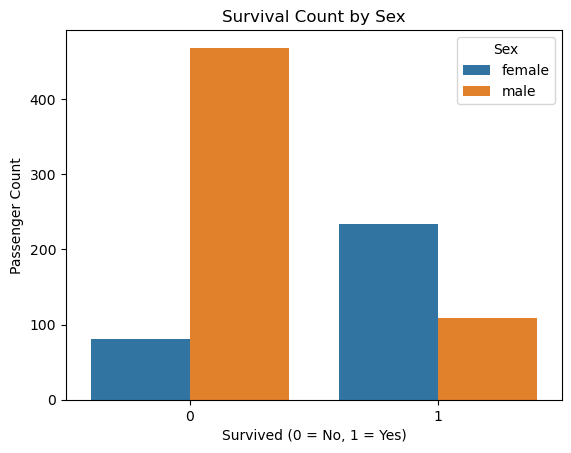


Percentage survival by Sex:
Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


In [36]:
#Survival with Sex
# Bar plot: Survival count grouped by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.legend(title='Sex')
plt.show()

# Percentage cross-tab of survival by sex
print("\nPercentage survival by Sex:")
print(pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1))

C:\Users\ACER\AppData\Local\Temp\ipykernel_18488\3663508462.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Embarked')


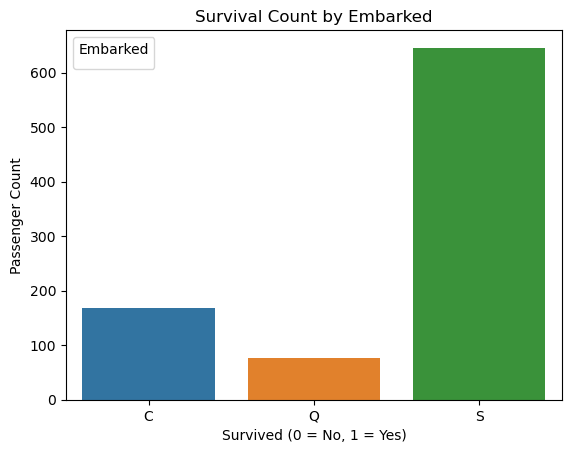


Percentage survival by Embarked:
Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


In [37]:
sns.countplot(x='Embarked', hue='Embarked', data=df)
plt.title('Survival Count by Embarked')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.legend(title='Embarked')
plt.show()

# Percentage cross-tab of survival by sex
print("\nPercentage survival by Embarked:")
print(pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1))

<Figure size 1500x600 with 0 Axes>

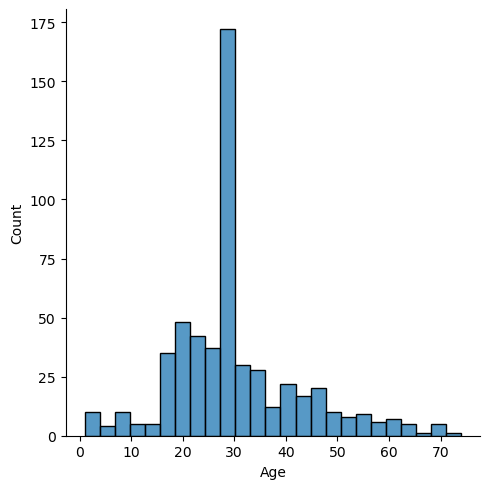

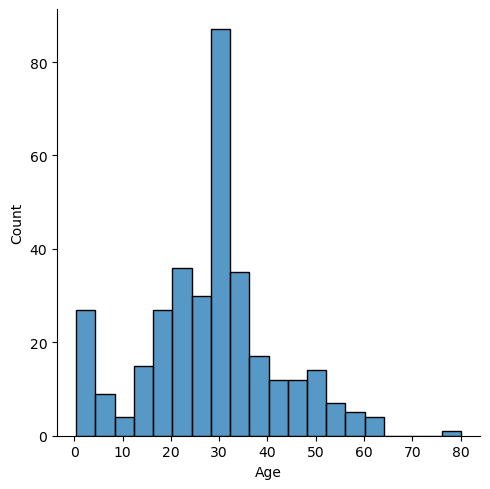

In [39]:
#Survived with age
plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Age'])
sns.displot(df[df['Survived']==1]['Age'])

<Figure size 1500x600 with 0 Axes>

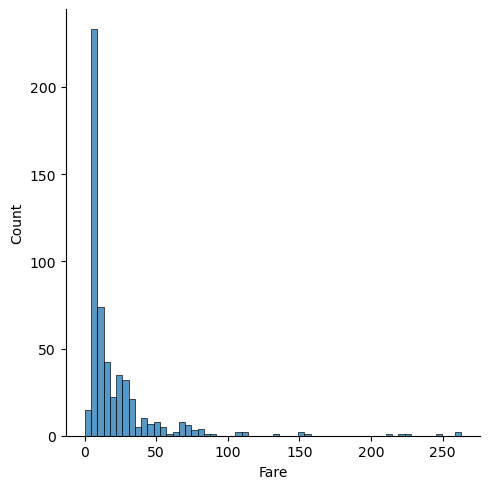

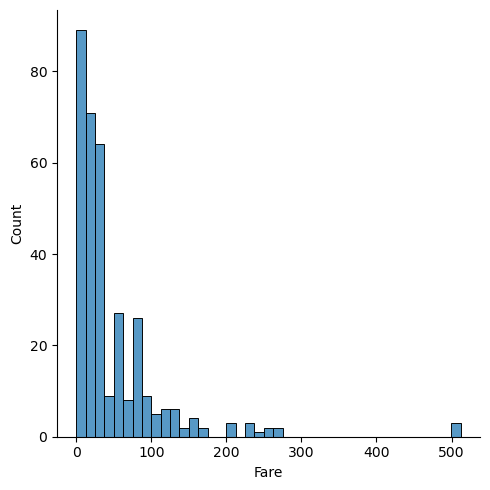

In [40]:
#Survived with Fare
plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Fare'])
sns.displot(df[df['Survived']==1]['Fare'])

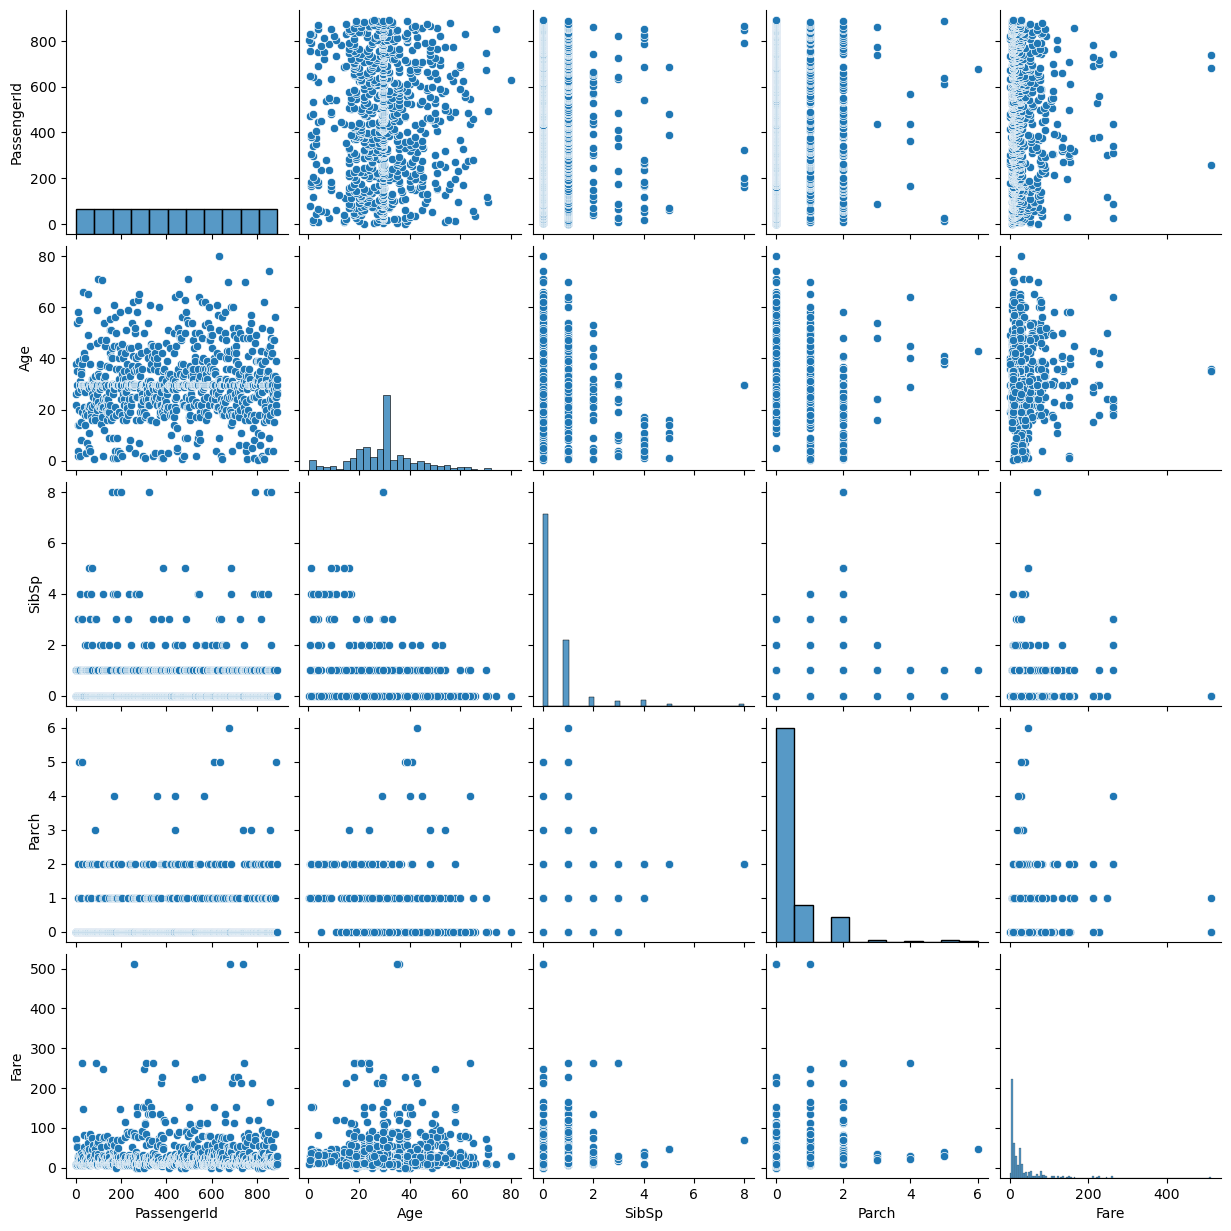

In [41]:
sns.pairplot(df)

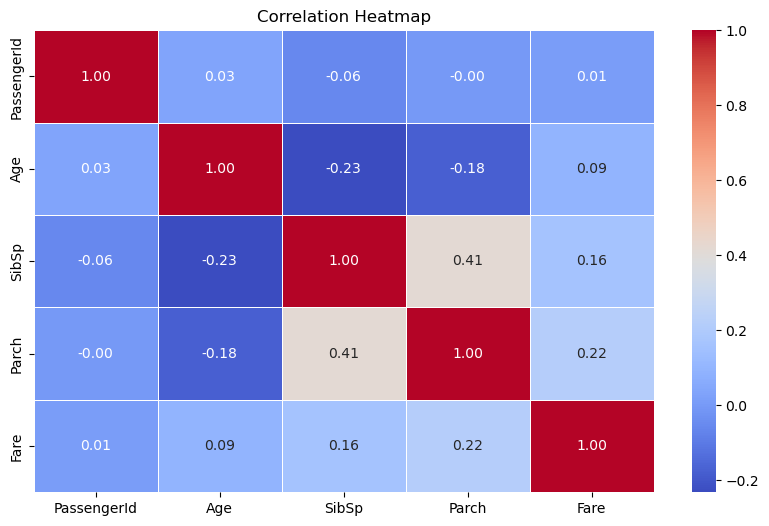

In [43]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
#feature engineering
df['family_size'] = df['Parch'] + df['SibSp']


In [47]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,S,0
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,0
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S,0
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S,6


In [48]:
def family_type(number):
    if number == 0:
        return "Alone"
    elif number> 0 and number <= 4:
        return "Medium"
    else:
        return "large"

In [49]:
df['family_type'] = df["family_size"].apply(family_type)

In [50]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.000000,0,0,7598,8.0500,S,0,Alone
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.000000,0,0,2699,18.7875,C,0,Alone
833,834,0,3,"Augustsson, Mr. Albert",male,23.000000,0,0,347468,7.8542,S,0,Alone
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.000000,0,0,347073,7.7500,S,0,Alone
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,29.699118,0,0,370375,7.7500,Q,0,Alone


In [51]:
#Dropping Sibsp , parch and family_size
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [52]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,244310,13.0000,S,Alone
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,SC/PARIS 2167,27.7208,C,Medium
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,PC 17572,76.7292,C,Medium
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,113776,66.6000,S,Medium
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,31027,21.0000,S,Medium


In [54]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)


Survived,0,1
family_type,,
Alone,69.6,30.4
Medium,44.0,56.0
large,85.1,14.9


In [55]:
#handling outliers in age(Almost normal)
df = df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [57]:
#handling outliers from Fare columns
#Finding quartiles
Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)
IQR = Q3 - Q1
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= outlier_low) & (df['Fare'] <= outlier_high)]


In [65]:
#one hot encoding
df.sample(4)
#cols to be transformed are Pclass, Sex, Embarked, family_type
pd.get_dummies(data=df,columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

KeyError: "None of [Index(['Pclass', 'Sex', 'Embarked', 'family_type'], dtype='object')] are in the [columns]"

In [66]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'family_type_Medium', 'family_type_large'],
      dtype='object')


In [68]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Medium,family_type_large
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,False,True,True,False,True,True,False
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,False,False,False,False,True,True,False
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29.699118,330877,8.4583,False,True,True,True,False,False,False


In [70]:
# Convert all boolean columns to integers (0/1)
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)


In [71]:
df.head()
df.dtypes


PassengerId              int64
Survived              category
Name                    object
Age                    float64
Ticket                  object
Fare                   float64
Pclass_2                 int64
Pclass_3                 int64
Sex_male                 int64
Embarked_Q               int64
Embarked_S               int64
family_type_Medium       int64
family_type_large        int64
dtype: object

In [72]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Medium,family_type_large
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0,1,1,0,1,1,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29.699118,330877,8.4583,0,1,1,1,0,0,0


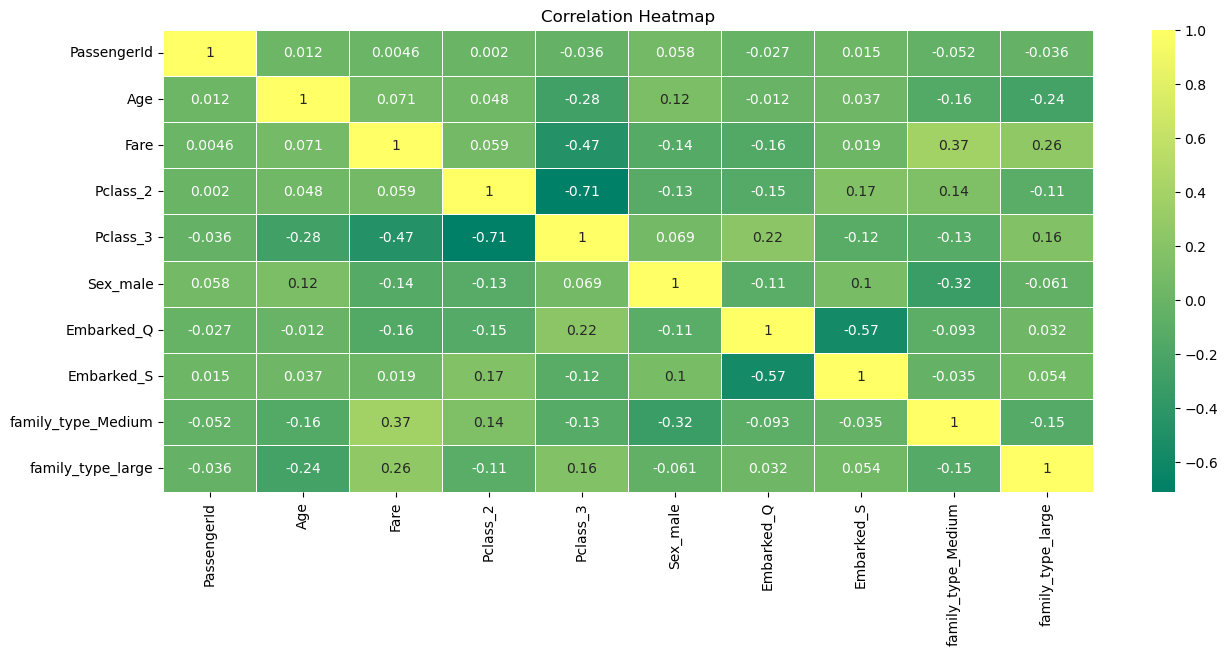

In [75]:
plt.figure(figsize=(15, 6))

# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap='summer', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
